<a href="https://colab.research.google.com/github/Chi-nm/bda_lab/blob/main/Car_price_bda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=0cf83676c2299b0ea6a2eebf52898895c5c74ca0b64312435eb0652847832d17
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 406.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.4 MB/

In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, lit, count, isnan, col
from pyspark.ml.feature import VectorAssembler, OneHotEncoder, StringIndexer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
import gradio as gr

In [4]:
# Create Spark session
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [5]:
spark

In [6]:
# Load data
data = spark.read.csv('/content/data.csv', inferSchema=True, header=True)


In [7]:
data.printSchema()

root
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Engine Fuel Type: string (nullable = true)
 |-- Engine HP: integer (nullable = true)
 |-- Engine Cylinders: integer (nullable = true)
 |-- Transmission Type: string (nullable = true)
 |-- Driven_Wheels: string (nullable = true)
 |-- Number of Doors: integer (nullable = true)
 |-- Market Category: string (nullable = true)
 |-- Vehicle Size: string (nullable = true)
 |-- Vehicle Style: string (nullable = true)
 |-- highway MPG: integer (nullable = true)
 |-- city mpg: integer (nullable = true)
 |-- Popularity: integer (nullable = true)
 |-- MSRP: integer (nullable = true)



In [8]:
data.show(5)

+----+----------+----+--------------------+---------+----------------+-----------------+----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+
|Make|     Model|Year|    Engine Fuel Type|Engine HP|Engine Cylinders|Transmission Type|   Driven_Wheels|Number of Doors|     Market Category|Vehicle Size|Vehicle Style|highway MPG|city mpg|Popularity| MSRP|
+----+----------+----+--------------------+---------+----------------+-----------------+----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+
| BMW|1 Series M|2011|premium unleaded ...|      335|               6|           MANUAL|rear wheel drive|              2|Factory Tuner,Lux...|     Compact|        Coupe|         26|      19|      3916|46135|
| BMW|  1 Series|2011|premium unleaded ...|      300|               6|           MANUAL|rear wheel drive|              2|  Luxury,Performance|     Compact|  Convertible

In [9]:
data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Make,11914,None,None,Acura,Volvo
Model,11914,745.5822222222222,1490.8280590623795,1 Series,xD
Year,11914,2010.384337753903,7.5797398875957995,1990,2017
Engine Fuel Type,11911,None,None,diesel,regular unleaded
Engine HP,11845,249.38607007176023,109.19187025917194,55,1001
Engine Cylinders,11884,5.628828677213059,1.78055934824622,0,16
Transmission Type,11914,None,None,AUTOMATED_MANUAL,UNKNOWN
Driven_Wheels,11914,None,None,all wheel drive,rear wheel drive
Number of Doors,11908,3.4360933825999327,0.8813153865835529,2,4


In [10]:
print((data.count(), len(data.columns)))

(11914, 16)


In [11]:
# Data cleaning
def replace(column, value):
    return when(column != value, column).otherwise(lit(None))

data = data.withColumn("Market Category", replace(col("Market Category"), "N/A"))
data = data.drop("Market Category")
data = data.na.drop()



In [12]:
from pyspark.sql.functions import when,lit,count,isnan,col
data.select([count(when(isnan(c)|col(c).isNull(),c)).alias(c) for c in data.columns]).show()

+----+-----+----+----------------+---------+----------------+-----------------+-------------+---------------+------------+-------------+-----------+--------+----------+----+
|Make|Model|Year|Engine Fuel Type|Engine HP|Engine Cylinders|Transmission Type|Driven_Wheels|Number of Doors|Vehicle Size|Vehicle Style|highway MPG|city mpg|Popularity|MSRP|
+----+-----+----+----------------+---------+----------------+-----------------+-------------+---------------+------------+-------------+-----------+--------+----------+----+
|   0|    0|   0|               0|        0|               0|                0|            0|              0|           0|            0|          0|       0|         0|   0|
+----+-----+----+----------------+---------+----------------+-----------------+-------------+---------------+------------+-------------+-----------+--------+----------+----+



In [13]:
data.printSchema()

root
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Engine Fuel Type: string (nullable = true)
 |-- Engine HP: integer (nullable = true)
 |-- Engine Cylinders: integer (nullable = true)
 |-- Transmission Type: string (nullable = true)
 |-- Driven_Wheels: string (nullable = true)
 |-- Number of Doors: integer (nullable = true)
 |-- Vehicle Size: string (nullable = true)
 |-- Vehicle Style: string (nullable = true)
 |-- highway MPG: integer (nullable = true)
 |-- city mpg: integer (nullable = true)
 |-- Popularity: integer (nullable = true)
 |-- MSRP: integer (nullable = true)



In [14]:
# Convert Spark DataFrame to Pandas for visualization
pandas_df = data.toPandas()

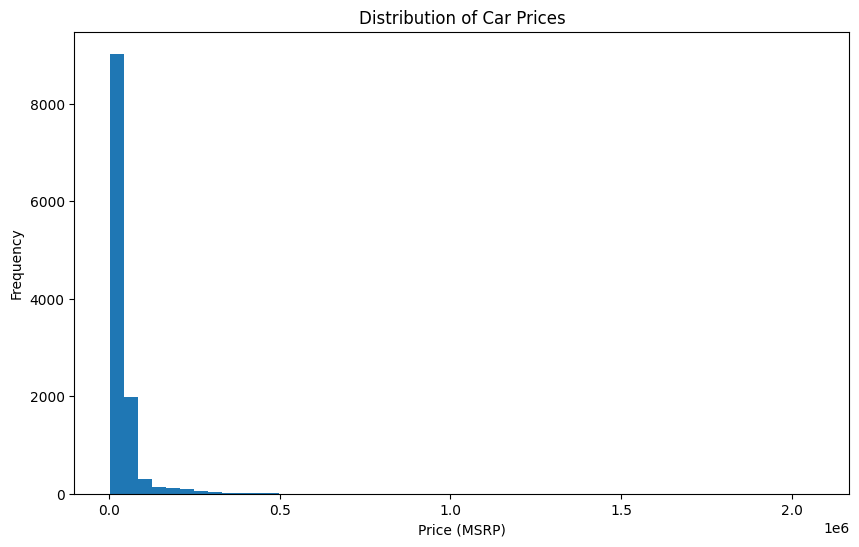

In [15]:
# Visualization 1: Distribution of car prices
plt.figure(figsize=(10, 6))
plt.hist(pandas_df["MSRP"], bins=50)
plt.title("Distribution of Car Prices")
plt.xlabel("Price (MSRP)")
plt.ylabel("Frequency")
plt.show()



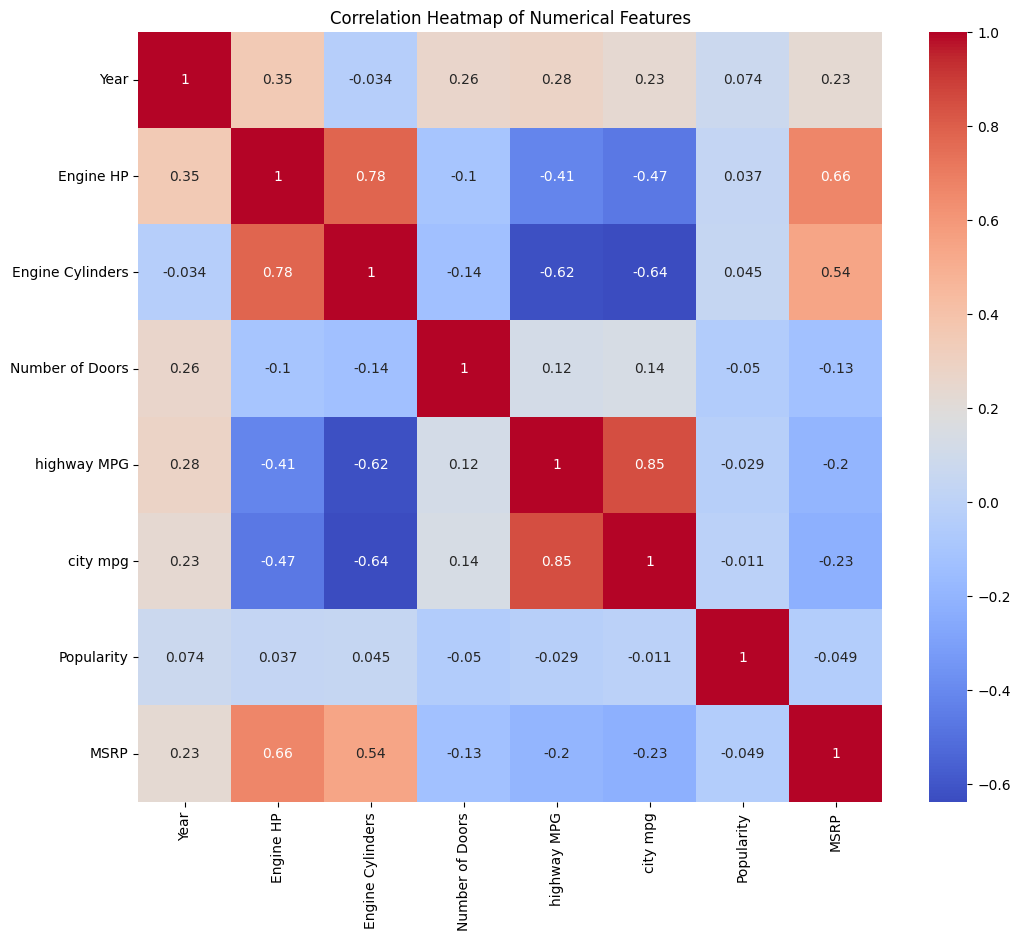

In [16]:
# Visualization 2: Correlation heatmap
numerical_features = ["Year", "Engine HP", "Engine Cylinders", "Number of Doors", "highway MPG", "city mpg", "Popularity", "MSRP"]
corr_df = pandas_df[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()



In [17]:
# Prepare data for modeling
indexer = StringIndexer(inputCol="Make", outputCol="BrandIndex", handleInvalid="keep")
encoder = OneHotEncoder(inputCol="BrandIndex", outputCol="BrandVec")

assembler = VectorAssembler(
    inputCols=["BrandVec", "Year", "Engine HP", "Engine Cylinders", "Number of Doors", "highway MPG", "city mpg", "Popularity"],
    outputCol="Input Attributes"
)

In [18]:
# Create and configure the model
regressor = RandomForestRegressor(featuresCol='Input Attributes', labelCol="MSRP")

In [19]:
# Create the pipeline
pipeline = Pipeline(stages=[indexer, encoder, assembler, regressor])

In [20]:
#--Saving the Pipeline
pipeline.write().overwrite().save("pipeline_save")

In [21]:
pipelineModel = Pipeline.load('./pipeline_save')

In [22]:
# Parameter tuning
paramGrid = ParamGridBuilder() \
    .addGrid(regressor.numTrees, [100, 500]) \
    .build()

In [23]:
# Cross validation
crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=paramGrid,
    evaluator=RegressionEvaluator(labelCol="MSRP"),
    numFolds=3
)

In [24]:
# Split the data
train_data, test_data = data.randomSplit([0.8, 0.2], seed=123)

In [25]:
# Fit the model
cvModel = crossval.fit(train_data)


In [26]:
# Make predictions
predictions = cvModel.transform(test_data)

In [27]:
print(predictions.select("MSRP", "prediction").show(5))

+-----+------------------+
| MSRP|        prediction|
+-----+------------------+
|28030|30936.741100829666|
|30550|37397.783864216886|
|29350|27624.765643886625|
|27900|27387.911402758953|
|34890|27387.911402758953|
+-----+------------------+
only showing top 5 rows

None


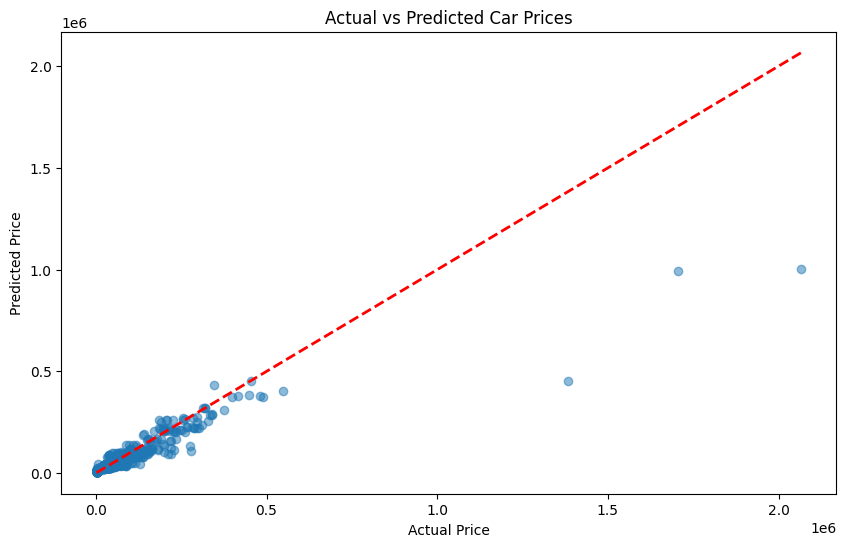

In [28]:
# Visualization 3: Actual vs Predicted prices
predictions_df = predictions.select("MSRP", "prediction").toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(predictions_df["MSRP"], predictions_df["prediction"], alpha=0.5)
plt.plot([predictions_df["MSRP"].min(), predictions_df["MSRP"].max()],
         [predictions_df["MSRP"].min(), predictions_df["MSRP"].max()],
         'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()


In [29]:
# Evaluate the model
evaluator = RegressionEvaluator(labelCol="MSRP")
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R2: {r2:.3f}")

RMSE: 36054.236
MAE: 10490.540
R2: 0.781


In [30]:
# Prediction function for Gradio
def predict_price(brand, year, engine_hp, engine_cylinders, num_doors, highway_mpg, city_mpg, popularity):
    input_data = spark.createDataFrame([(brand, year, engine_hp, engine_cylinders, num_doors, highway_mpg, city_mpg, popularity)],
                                       ["Make", "Year", "Engine HP", "Engine Cylinders", "Number of Doors", "highway MPG", "city mpg", "Popularity"])
    prediction = cvModel.transform(input_data)
    return prediction.select("prediction").collect()[0][0]

# Create Gradio interface
iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Dropdown(choices=data.select("Make").distinct().rdd.flatMap(lambda x: x).collect(), label="Brand"),
        gr.Slider(1900, 2023, step=1, label="Year"),
        gr.Slider(50, 1000, step=1, label="Engine HP"),
        gr.Slider(2, 16, step=1, label="Engine Cylinders"),
        gr.Slider(2, 5, step=1, label="Number of Doors"),
        gr.Slider(10, 100, step=1, label="Highway MPG"),
        gr.Slider(5, 80, step=1, label="City MPG"),
        gr.Slider(1, 5000, step=1, label="Popularity")
    ],
    outputs=gr.Number(label="Predicted Price",precision=2),
    title="Car Price Predictor",
    description="Enter the car details to predict its price."
)

# Launch the Gradio interface
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a9a9b9f9c358a57a80.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
